In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import math
import pickle
from collections import Counter
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score,confusion_matrix
from matplotlib import pyplot
%matplotlib inline

In [2]:
DATA_PATH = "/Users/siva/Documents/interview_preparation/heavy_water_backup/document-classification-test/shuffled-full-set-hashed.csv"

In [3]:
total_data_from_csv = {"labels":[],"documents":[]}
with open(DATA_PATH) as csv_file:
    csv_reader = csv.reader(csv_file)
    for each_row in csv_reader:
        total_data_from_csv["labels"].append(each_row[0])
        total_data_from_csv["documents"].append(each_row[1])
print("Total number of documents:",len(total_data_from_csv["documents"]))
print("Total number of labels:",len(total_data_from_csv["labels"]))

Total number of documents: 62204
Total number of labels: 62204


In [6]:
train_data,test_data,train_labels,test_labels = train_test_split(total_data_from_csv["documents"],\
                                                                 total_data_from_csv["labels"],\
                                                                test_size = 0.33)
print("Number of train datapoints:",len(train_data))
print("Number of test datapoints:",len(test_data))

Number of train datapoints: 41676
Number of test datapoints: 20528


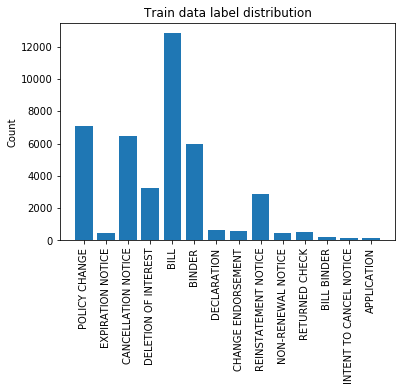

In [10]:
train_labels_distribution = Counter(train_labels)
_ = plt.bar(np.arange(len(train_labels_distribution)),train_labels_distribution.values())
_ = plt.xticks(np.arange(len(train_labels_distribution)),train_labels_distribution.keys(),rotation = 90)
_ = plt.ylabel("Count")
_ = plt.title("Train data label distribution")

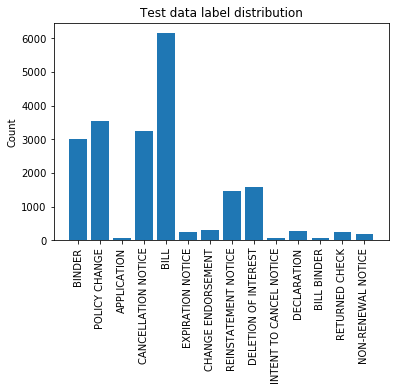

In [11]:
test_labels_distribution = Counter(test_labels)
_ = plt.bar(np.arange(len(test_labels_distribution)),test_labels_distribution.values())
_ = plt.xticks(np.arange(len(test_labels_distribution)),test_labels_distribution.keys(),rotation = 90)
_ = plt.ylabel("Count")
_ = plt.title("Test data label distribution")

In [12]:
#finding the features from the documents
vectorizer = TfidfVectorizer(min_df = 0.1)
train_features_ = vectorizer.fit_transform(train_data).toarray()
print("Number of features:",train_features_.shape[1])

Number of features: 310


In [13]:
#finding the test features with the same vectorizer used for train data
test_features = vectorizer.transform(test_data).toarray()
print("Number of features:",test_features.shape[1])

Number of features: 310


In [13]:
#Saving the vectorizer to be used for web demo
with open("vectorizer.pk","wb") as file:
    pickle.dump(vectorizer,file)

In [15]:
#First tried a simple to check if there is linear relationship between the features and labels using Naive Bayes
train_features = train_features_[:]
BATCH_SIZE = 1000
Naive_Bayes = MultinomialNB(alpha = 0.01)
for batch in range(math.ceil(train_features.shape[0]/BATCH_SIZE)):
    train_batch_data = train_features[(batch*BATCH_SIZE):(batch+1)*BATCH_SIZE,:]
    train_batch_labels = train_labels[(batch*BATCH_SIZE):(batch+1)*BATCH_SIZE]
    Naive_Bayes.partial_fit(train_batch_data,train_batch_labels,classes = np.unique(train_labels))
#joblib.dump(Naive_Bayes,"Naive_Bayes.pkl") #saving the model for web demo
print("Accuracy of Naive Bayes:",Naive_Bayes.score(test_features,test_labels))

Accuracy of Naive Bayes: 0.706839438815


In [ ]:
#SVM non-linear classifier
svm_classifier = SVC()
svm_classifier.fit(train_features,train_labels)
print("Accuracy of RBF kernel Support Vector Machine:",svm_classifier.score(test_features,test_labels))

In [17]:
#Random forest classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(train_features_,train_labels)
print("Accuracy of Random Forest Classifier:",random_forest_classifier.score(test_features,test_labels))

Accuracy of Random Forest Classifier: 0.839487529228


In [18]:
#Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(train_features_,train_labels)
print("Accuracy of Gradient Boosting classifier:",gradient_boosting_classifier.score(test_features,test_labels))

Accuracy of Gradient Boosting classifier: 0.843238503507


In [23]:
"""
Since the classes distribution is not equal, accuracy is not really good way to measure the performance
of the classifier, therefore used F1 score for the best classifiers
"""
random_forest_predictions = random_forest_classifier.predict(test_features)
gradient_boosting_predictions = gradient_boosting_classifier.predict(test_features)

print("Random forest classifier f1 score:",f1_score(test_labels,random_forest_predictions,average = "weighted"))
print("Gradient Boosting f1 score:",f1_score(test_labels,gradient_boosting_predictions,average = "weighted"))

Random forest classifier f1 score: 0.83447665183
Gradient Boosting f1 score: 0.839657565699


In [15]:
#Used to save the random forest and gradient boosting classifier to be used for web demo
#joblib.dump(random_forest_classifier,"random_forest.pkl")
#joblib.dump(gradient_boosting_classifier,"gradient_boosting.pkl")

['gradient_boosting.pkl']

In [20]:
print(test_data[1540].replace(" ","?"),test_labels[1540])

6d10c76d455a?9e851f85cce7?99e613bf119e?3e400a646af9?99e613bf119e?30ca33997a38?10e45001c2f2?97b6014f9e50?30ca33997a38?97b6014f9e50?422068f04236?99e613bf119e?99e613bf119e?b9699ce57810?6ce6cc5a3203?99e613bf119e?99e613bf119e?6ce6cc5a3203?10e45001c2f2?422068f04236?094453b4e4ae?30ca33997a38?094453b4e4ae?f95d0bea231b?30ca33997a38?f7ae6f8257da?8f09a81591d3?133d46f7ed38?133d46f7ed38?1669ab06727a?8f09a81591d3?853a7c78d8ed?21e314d3afcc?f7ae6f8257da?08e4bf0424b2?1669ab06727a?6ce6cc5a3203?d8d9e71057f3?9e851f85cce7?6d10c76d455a?b9699ce57810?b9699ce57810?9e851f85cce7?6d10c76d455a?97b6014f9e50?99e613bf119e?99e613bf119e?6ce6cc5a3203?6ce6cc5a3203?ebb57cb42895?99e613bf119e?10e45001c2f2?10e45001c2f2?99e613bf119e?99e613bf119e?30ca33997a38?30ca33997a38?422068f04236?422068f04236?f7ae6f8257da?f7ae6f8257da?52f1069204a2?094453b4e4ae?2a2e00326eb6?30ca33997a38?97b6014f9e50?8f09a81591d3?2e85d01c5d75?a8be347d6021?133d46f7ed38?133d46f7ed38?1669ab06727a?1669ab06727a?b9699ce57810?b9699ce57810?9e851f85cce7?9e851f85cce7

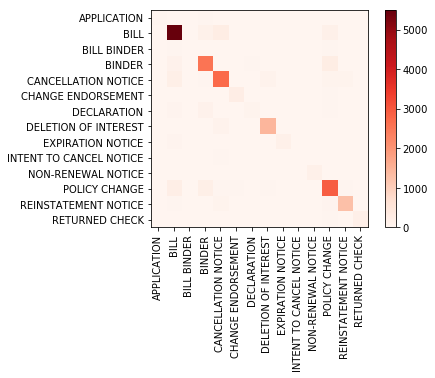

In [36]:
confusion_mat = confusion_matrix(test_labels,gradient_boosting_predictions)
_ = plt.imshow(confusion_mat,interpolation='nearest',cmap = plt.get_cmap("Reds"))
_ = plt.xticks(np.arange(len(np.unique(test_labels))),np.unique(test_labels),rotation = 90)
_ = plt.yticks(np.arange(len(np.unique(test_labels))),np.unique(test_labels))
_ = plt.colorbar()